In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("dataset/medical_examination.csv", index_col=[0])

In [3]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   sex          70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [5]:
df["overweight"] = (df["weight"] / (df["height"] / 100) **2) > 25

In [6]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,False
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,True
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,False
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,True
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,False


In [7]:
df["cholesterol"].unique()

array([1, 3, 2])

In [8]:
df["gluc"].unique()

array([1, 2, 3])

In [9]:
df["cholesterol"] = df["cholesterol"].apply(lambda x: 0 if x == 1 else 1)
df["gluc"] = df["gluc"].apply(lambda x: 0 if x == 1 else 1)

In [10]:
df.head(20)

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,False
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,True
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,False
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,True
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,False
8,21914,1,151,67.0,120,80,1,1,0,0,0,0,True
9,22113,1,157,93.0,130,80,1,0,0,0,1,0,True
12,22584,2,178,95.0,130,90,1,1,0,0,1,1,True
13,17668,1,158,71.0,110,70,0,0,0,0,1,0,True


In [11]:
print(df["smoke"].unique())
print(df["alco"].unique())
print(df["active"].unique())
print(df["overweight"].unique())


[0 1]
[0 1]
[1 0]
[False  True]


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 


In [13]:
def draw_cat_plot():

    df_cat = pd.melt(
        df,
        id_vars=["cardio"],

        #This remains the pivot or the basis of distribution
        value_vars=["cholesterol","gluc","smoke","alco","active","overweight"]
        #These are the values that are to be shown based on the status of the id vars
        # pd.melt transforms the DataFrame from wide to long format.
        # 'cardio' column stays as an identifier,
        # while the columns cholesterol, gluc, smoke, alco, active, overweight
        # are unpivoted into two columns: one for the variable name and one for its value.
    )

    # pd.melt: changes the shape of your data table — how the data is arranged in rows and columns.
    # pd.melt makes it easier to count, analyze, and visualize data when multiple related columns need to be treated as one categorical variable.

    df_cat = df_cat.groupby(["cardio","variable","value"]).size().reset_index(name="total")

    # This groups the melted DataFrame by 'cardio', the variable name, and its value.
    # Then it counts how many times each combination occurs.
    # 'total' represents the number of occurrences (i.e., repetitions) of each (cardio, variable, value) combination.

    fig = sns.catplot(
        data = df_cat,
        #df_cat is our melted and grouped dataset. It contains the above columns that is cardio, variable, value and counts
        kind = "bar",
        #type of plot
        x = "variable",
        # The X-axis will show the name of the variable
        y="total",
        # The Y-axis will show the total that is the count , how many people fall in each category
        hue="value",
        # The bars are coloured based on the    value of the variable
        col = "cardio"
        # This creates two seperate plots side by side.
    )

    return fig



In [14]:
def draw_heat_map():

    df_heat = df[
        (df["ap_lo"] <= df["ap_hi"]) &
        #Only keep rows where diastolic pressure (ap_lo) is less than or equal to systolic pressure (ap_hi)."
         (df["height"] >= df["height"].quantile(0.025)) &
         (df["height"] <= df["height"].quantile(0.975)) &
         (df["weight"] >= df["weight"].quantile(0.025)) &
         (df["weight"] <= df["weight"].quantile(0.975))

         #the above code is filtering the height and weight that is between 25 - 97.5 percent removing the outliers
        ]
    
    corr = df_heat.corr()
    # It calculates the correlation matrix for the numeric columns in df_heat.

    # A correlation is a measure of how strongly two numeric variables are related.


    mask = np.triu(np.ones_like(corr, dtype = bool))

    # mask is a Boolean matrix (a grid of True and False values) used to tell Seaborn which parts of the heatmap to hide.

    # np.ones_like(corr, dtype=bool)

        # Creates a matrix of the same shape as corr, filled with True.

        # Example: a 5×5 matrix of all True values if corr has 5 columns.

    # np.triu(...)

        # Keeps only the upper triangle of the matrix (Trues), and sets the lower triangle to False.

        # triu stands for "triangle upper".

    # Because the correlation matrix is symmetric — meaning:
    # corr[A][B] == corr[B][A]
    # So showing both the upper and lower triangle is redundant. We mask the upper triangle to:
    # Avoid clutter on the heatmap
    # Focus on unique correlations only once


    fig, ax = plt.subplots(figsize=(12,10))

    sns.heatmap(corr,
                # The correlation matrix data to plot as a heatmap
                annot=True,
                # Annotate each cell with the numeric value (show numbers on the heatmap)
                fmt=".1f",
                # Format for the annotation numbers (one decimal place)
                mask=mask,
                # Mask (hide) the upper triangle cells (where mask == True)
                square=True,
                # Make each cell square-shaped for equal aspect ratio
                linewidths=0.5,
                # Width of the lines between cells (grid lines)
                center=0,
                # Center the colormap at zero (good for correlations, which range from -1 to 1)
                cbar_kws={"shrink" : 0.5})
                # Keyword args for the colorbar size: shrink it to 50% of original size
    plt.close(fig)
    return fig 


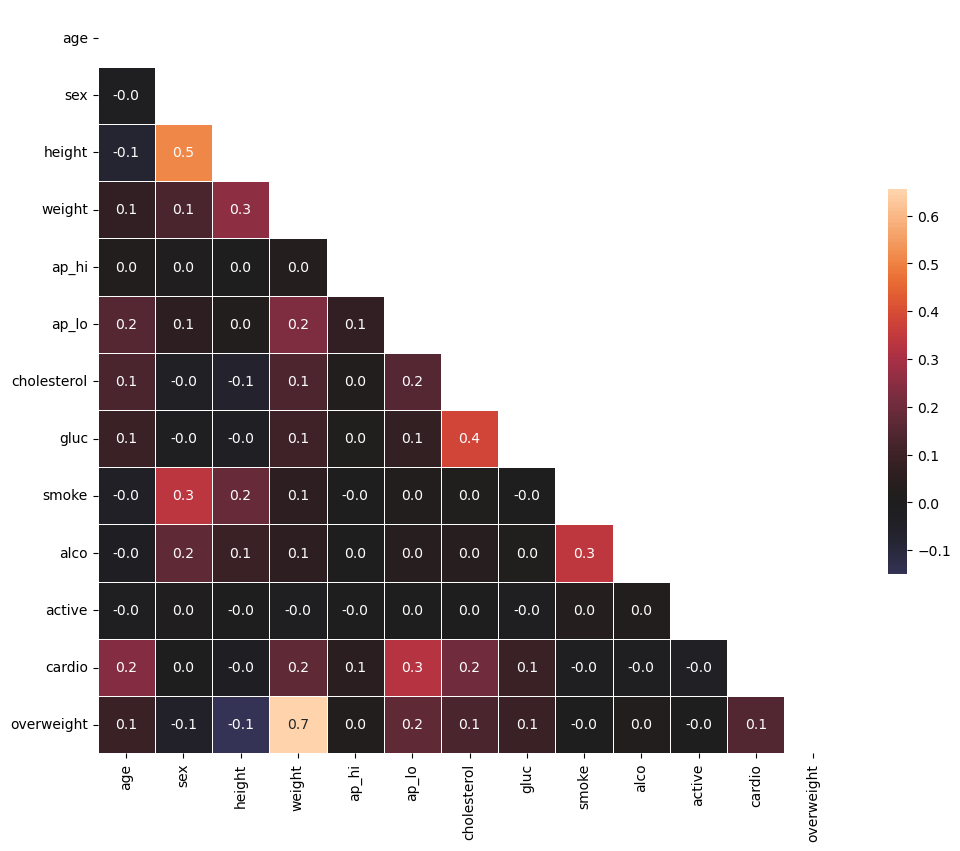

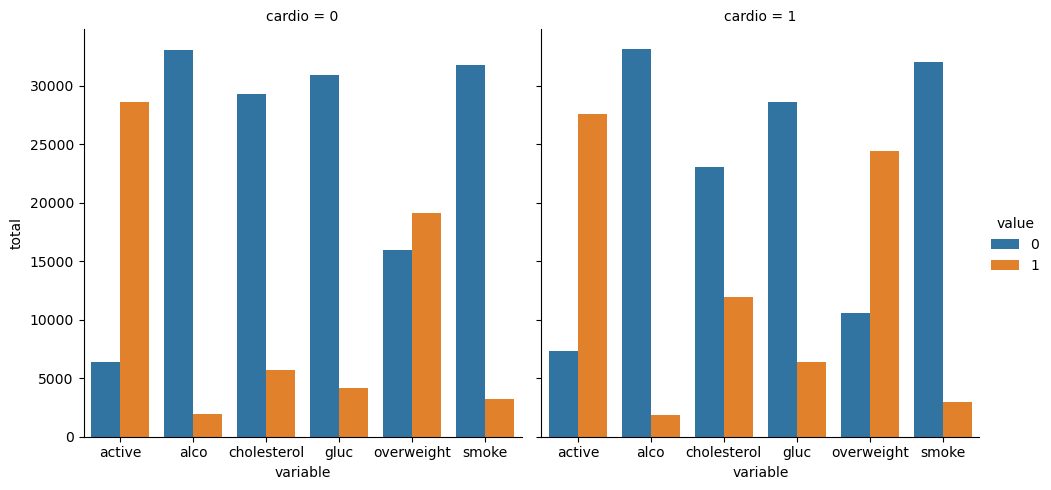

In [15]:
draw_cat_plot()
draw_heat_map()